In [ ]:
import pandas as pd
import numpy as np
import scipy
import os

RQ1_DATA_FOLDER_PATH = "../experiment_data/RQ1_data/"

subfolders = [f for f in os.listdir(RQ1_DATA_FOLDER_PATH)
              if os.path.isdir(os.path.join(RQ1_DATA_FOLDER_PATH, f))]

rq_1_df = pd.DataFrame()

for folder in subfolders:
    xlsx_files = [f for f in os.listdir(
        RQ1_DATA_FOLDER_PATH+folder) if f.endswith(".xlsx")]
    for xlsx_file in xlsx_files:
        xlsx_file_path = RQ1_DATA_FOLDER_PATH + f"{folder}/{xlsx_file}"
        temp_df = pd.read_excel(xlsx_file_path)
        temp_df["participant"] = folder
        rq_1_df = pd.concat([rq_1_df, temp_df], ignore_index=True)


In [3]:
code_snippets = {
    1: """public void cleanCache(File dir, Formatter sbuff, boolean isRoot) {
    long now = System.currentTimeMillis();
    File[] files = dir.listFiles();
    if (files == null) {
      throw new IllegalStateException( "DiskCache2: not a directory or I/O error on dir="+dir.getAbsolutePath());
    }

    
    if (!isRoot && (files.length == 0)) {
      long duration = now - dir.lastModified();
      duration /= 1000 * 60;
      if (duration > persistMinutes) {
        boolean ok = dir.delete();
        if (!ok)
          cacheLog.error("Unable to delete file " + dir.getAbsolutePath());
        if (sbuff != null)
          sbuff.format(" deleted %s %s lastModified= %s%n", ok, dir.getPath(), CalendarDate.of(dir.lastModified()));
      }
      return;
    }

    
    for (File file : files) {
      if (file.isDirectory()) {
        cleanCache(file, sbuff, false);
      } else {
        long duration = now - file.lastModified();
        duration /= 1000 * 60;
        if (duration > persistMinutes) {
          boolean ok = file.delete();
          if (!ok)
            cacheLog.error("Unable to delete file " + file.getAbsolutePath());
          if (sbuff != null)
            sbuff.format(" deleted %s %s lastModified= %s%n", ok, file.getPath(), CalendarDate.of(file.lastModified()));
        }
      }
    }
  }""",
    2: """public boolean[] asBoolArray() {
        boolean[] retval;
        UBArray array = asArray();
        switch(array.getStrongType()){
            case Int8: {
                byte[] data = ((UBInt8Array) array).getValues();
                retval = new boolean[data.length];
                for (int i = 0; i < data.length; i++) {
                    retval[i] = data[i] > 0;
                }
                break;
            }

            case Int16: {
                short[] data = ((UBInt16Array) array).getValues();
                retval = new boolean[data.length];
                for (int i = 0; i < data.length; i++) {
                    retval[i] = data[i] > 0;
                }
                break;
            }

            case Int32: {
                int[] data = ((UBInt32Array)array).getValues();
                retval = new boolean[data.length];
                for (int i = 0; i < data.length; i++) {
                    retval[i] = data[i] > 0;
                }
                break;
            }

            case Int64: {
                long[] data = ((UBInt64Array)array).getValues();
                retval = new boolean[data.length];
                for (int i = 0; i < data.length; i++) {
                    retval[i] = data[i] > 0;
                }
                break;
            }

            case Float32: {
                float[] data = ((UBFloat32Array) array).getValues();
                retval = new boolean[data.length];
                for (int i = 0; i < data.length; i++) {
                    retval[i] = data[i] > 0;
                }
                break;
            }

            case Float64: {
                double[] data = ((UBFloat64Array) array).getValues();
                retval = new boolean[data.length];
                for (int i = 0; i < data.length; i++) {
                    retval[i] = data[i] > 0;
                }
                break;
            }


            default:
                throw new RuntimeException("not an int32[] type");
        }

        return retval;
    }""",
    3: """Acquire a FileCacheable from the cache, and lock it so no one else can use it.
If not already in cache, open it with FileFactory, and put in cache.
<p/>
Call FileCacheable.close() when done, (rather than FileCacheIF.release() directly) and the file is then released instead of closed.
<p/>
If cache size goes over maxElement, then immediately (actually in 100 msec) schedule a cleanup in a background thread.
This means that the cache should never get much larger than maxElement, unless you have them all locked.

@param factory     use this factory to open the file if not in the cache; may not be null
@param hashKey     unique key for this file. If null, the location will be used
@param location    file location, may also used as the cache name, will be passed to the NetcdfFileFactory
@param buffer_size RandomAccessFile buffer size, if <= 0, use default size
@param cancelTask  user can cancel, ok to be null.
@param spiObject   sent to iosp.setSpecial() if not null
@return FileCacheable corresponding to location.
@throws IOException on error""",
    4: """public static boolean print(NetcdfFile nc, String command, Writer out, ucar.nc2.util.CancelTask ct)
          throws IOException {
    WantValues showValues = WantValues.none;
    boolean ncml = false;
    boolean strict = false;
    String varNames = null;
    String trueDataset = null;
    String fakeDataset = null;

    if (command != null) {
      StringTokenizer stoke = new StringTokenizer(command);

      while (stoke.hasMoreTokens()) {
        String toke = stoke.nextToken();
        if (toke.equalsIgnoreCase("-help")) {
          out.write(usage);
          out.write('\n');
          return true;
        }
        if (toke.equalsIgnoreCase("-vall"))
          showValues = WantValues.all;
        if (toke.equalsIgnoreCase("-c") && (showValues == WantValues.none))
          showValues = WantValues.coordsOnly;
        if (toke.equalsIgnoreCase("-ncml"))
          ncml = true;
        if (toke.equalsIgnoreCase("-cdl") || toke.equalsIgnoreCase("-strict"))
          strict = true;
        if(toke.equalsIgnoreCase("-v") && stoke.hasMoreTokens())
          varNames = stoke.nextToken();
        if (toke.equalsIgnoreCase("-datasetname") && stoke.hasMoreTokens()) {
          fakeDataset = stoke.nextToken();
          if(fakeDataset.length() == 0) fakeDataset = null;
          if(fakeDataset != null) {
            trueDataset = nc.getLocation();
            nc.setLocation(fakeDataset);
          }
        }
      }
    }

    boolean ok = print(nc, out, showValues, ncml, strict, varNames, ct);
    if(trueDataset != null && fakeDataset != null)
      nc.setLocation(trueDataset);
    return ok;
  }"""
}

### Data Cleaning

In [4]:
column_name_mapper = {
    "Tempo di completamento": "tempo_completamento", 
    "Tool usato?": "tool_used"
}

rq_1_df = rq_1_df.rename(columns=column_name_mapper)    

In [5]:
import pandas as pd
import re

def normalize_time(x):
    if pd.isna(x):
        return None
    
    # Converti in stringa e ripulisci
    s = str(x).strip().replace('"', '').replace("'", "")
    
    # Separa con ":" invece di "."
    s = s.replace(".", ":")
    
    # Caso: HH:MM:SS
    if re.match(r"^\d{1,2}:\d{1,2}:\d{1,2}$", s):
        h, m, sec = s.split(":")
        if h == "00":
            total_seconds = int(m) * 60 + int(sec)    
        else:
            total_seconds = int(h) * 60 + int(m)
    
    # Caso: M:SS,ms → ignoro millisecondi
    elif re.match(r"^\d{1,2}:\d{1,2},\d+$", s):
        m, rest = s.split(":")
        sec = rest.split(",")[0]
        total_seconds = int(m) * 60 + int(sec)
    
    # Caso: M:SS
    elif re.match(r"^\d{1,2}:\d{1,2}$", s):
        m, sec = s.split(":")
        total_seconds = int(m) * 60 + int(sec)
    
    # Caso: solo numero (minuti)
    elif s.isdigit():
        total_seconds = int(s) * 60
    
    else:
        return "None"
    
    # Conversione in formato MM:SS
    minutes, seconds = divmod(total_seconds, 60)
    return f"{minutes:02d}:{seconds:02d}"

In [6]:
def count_seconds(x):
    if pd.isna(x):
        return None
    time: str = x
    m, sec = time.split(":")
    m = int(m)
    sec = int(sec)
    return m*60 + sec


In [7]:
rq_1_df.columns

Index(['Script', 'Descrizione', 'tempo_completamento', 'tool_used',
       'participant'],
      dtype='object')

In [8]:
rq_1_df["tempo_completamento_normalized"] = rq_1_df["tempo_completamento"].apply(normalize_time)

In [9]:
righe_na = rq_1_df[rq_1_df["tempo_completamento_normalized"].isna()]

In [10]:
rq_1_df = rq_1_df.dropna(axis=0)

In [11]:
rq_1_df["tempo_completamento_normalized_seconds"] = rq_1_df["tempo_completamento_normalized"].apply(count_seconds)

### Save Dataframe as csv

In [12]:
rq_1_df.to_csv(f"{RQ1_DATA_FOLDER_PATH}/all_data_cleaned.csv")

### Check Script 1 

In [13]:
rq_1_df["tool_used"].unique()

array([ True, False])

In [14]:
tool_used_df_script1 = rq_1_df[rq_1_df["tool_used"]==True]
tool_used_df_script1.describe()

,Script,tempo_completamento_normalized_seconds
count,30.000000,30.000000
mean,2.366667,234.366667
std,1.159171,121.306248
min,1.000000,36.000000
25%,1.000000,142.500000
50%,2.000000,217.500000
75%,3.000000,298.750000
max,4.000000,510.000000


In [15]:
tool_not_used_df_script1 = rq_1_df[rq_1_df["tool_used"]==False]
tool_not_used_df_script1.describe()

,Script,tempo_completamento_normalized_seconds
count,34.000000,34.000000
mean,2.617647,330.411765
std,1.101368,205.745373
min,1.000000,45.000000
25%,2.000000,234.000000
50%,3.000000,299.500000
75%,3.750000,386.500000
max,4.000000,1188.000000


/var/folders/fx/zsdh_8412glbjpkff1h6xdlh0000gn/T/ipykernel_49903/4267010227.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


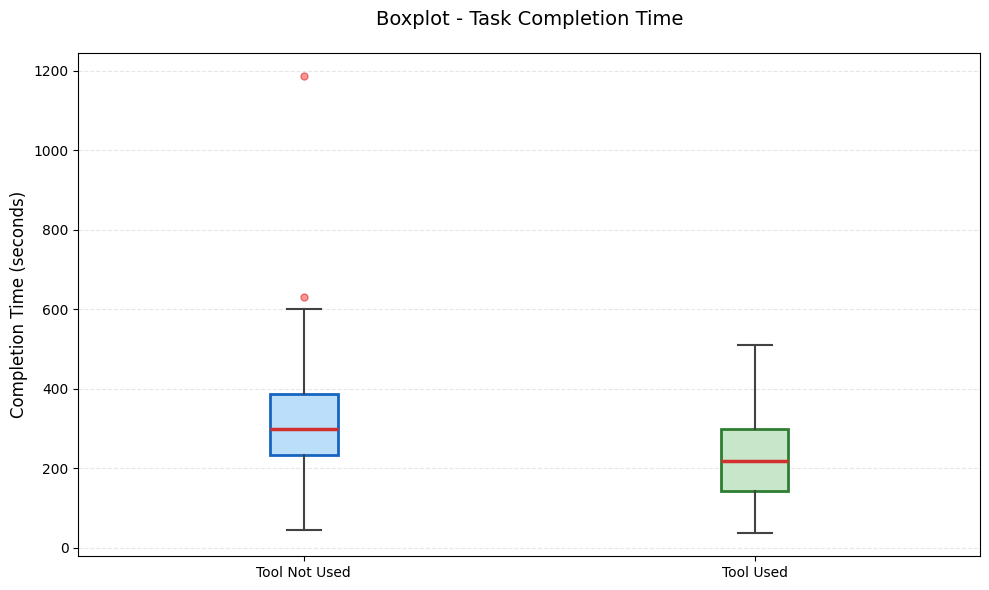

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Crea il boxplot
bp = plt.boxplot(
    [tool_not_used_df_script1["tempo_completamento_normalized_seconds"],
     tool_used_df_script1["tempo_completamento_normalized_seconds"]],
    labels=["Tool Not Used", "Tool Used"],
    patch_artist=True,
    medianprops=dict(color='#D32F2F', linewidth=2.5),
    whiskerprops=dict(color='#424242', linewidth=1.5),
    capprops=dict(color='#424242', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='#FF5252', markersize=5, linestyle='none', markeredgecolor='#D32F2F', alpha=0.6)
)

# Colori più leggibili e professionali
colors = ['#BBDEFB', '#C8E6C9']  # Blu pastello e verde pastello
edge_colors = ['#1565C0', '#2E7D32']  # Blu intenso e verde intenso

for patch, color, edge_color in zip(bp['boxes'], colors, edge_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(edge_color)
    patch.set_linewidth(2)

plt.ylabel("Completion Time (seconds)", fontsize=12)
plt.title("Boxplot - Task Completion Time", fontsize=14, pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig("../figures/boxplot_tempo_completamento.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [16]:
from scipy.stats import shapiro

shapiro(tool_used_df_script1["tempo_completamento_normalized_seconds"])

ShapiroResult(statistic=np.float64(0.9662832605535963), pvalue=np.float64(0.44308691512798504))

In [17]:
shapiro(tool_not_used_df_script1["tempo_completamento_normalized_seconds"])

ShapiroResult(statistic=np.float64(0.8179726207306985), pvalue=np.float64(5.8190176176840244e-05))

In [136]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(
    tool_used_df_script1["tempo_completamento_normalized_seconds"],
    tool_not_used_df_script1["tempo_completamento_normalized_seconds"],
    #alternative="two-sided"  # due code, per testare differenze in entrambe le direzioni
)

print("Statistic:", stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Possiamo rigettare ipotesi nulla -> TARS migliora i tempi")
else:
    print("NON Possiamo rigettare ipotesi nulla")

Statistic: 338.5
p-value: 0.021405672423244454
Possiamo rigettare ipotesi nulla -> TARS migliora i tempi


## Analisi sulla similarità del testo con la docstring

In [115]:
from sentence_transformers import SentenceTransformer

#model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")
#model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
model = SentenceTransformer("intfloat/multilingual-e5-base")

```
@article{wang2024multilingual,
  title={Multilingual E5 Text Embeddings: A Technical Report},
  author={Wang, Liang and Yang, Nan and Huang, Xiaolong and Yang, Linjun and Majumder, Rangan and Wei, Furu},
  journal={arXiv preprint arXiv:2402.05672},
  year={2024}
}
```

In [45]:
DATASET_FOLDER_PATH = "../output_files/explanations/java"

oracles = {}
files = [f for f in os.listdir(DATASET_FOLDER_PATH)
              if os.path.isfile(os.path.join(DATASET_FOLDER_PATH, f))]


for index, file in enumerate(files):
    txt_file_path = os.path.join(DATASET_FOLDER_PATH, file)
    with open(txt_file_path, "r", encoding="utf-8") as f:
        file_content = f.read()
    oracles[f"""{file.split(".txt")[0]}"""] = file_content


### Translate italian to english

In [21]:
import openai
from dotenv import load_dotenv
import tqdm
import os
tqdm.tqdm.pandas()

load_dotenv("../.env")

translate_prompt = """You are a smart text translator. Your task is to translate the italian text in english. Provide only the translation, without any introductive text.
Italian Text: {italian_description}"""

def translate_description(row):
    api_key = os.getenv("OPENAI_API_KEY")
    client = openai.OpenAI(api_key=api_key)

    prompt = translate_prompt.format(italian_description=row["Descrizione"])

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a helpful translation assistant."},
            {"role": "user", "content": prompt}
        ]
    )

    translated_text = response.choices[0].message.content.strip()
    row["english_description"] = translated_text
    return row


rq_1_df = rq_1_df.progress_apply(translate_description, axis=1) # type: ignore


100%|██████████| 64/64 [03:44<00:00,  3.51s/it]


### LLM EVALUATION

In [51]:
user_prompt = """
Your task is to verify whether the user’s explanation correctly matches the Java method’s docstring.
In other words, you must check if the explanation is coherent with what the docstring describes.
Typically, user explanations are longer, more detailed, and written in a conversational style compared to the concise technical description found in the docstring.

Docstring: {docstring}

User Explanation: {explanation}

Java Code: {code}

Never add any other text, respond only with one of the following, without any introductive text: 
Fully correct
Partially correct
Not Correct
"""

def llm_eval_description(oracle, user_explanation, java_code):
    api_key = os.getenv("OPENAI_API_KEY")
    client = openai.OpenAI(api_key=api_key)

    prompt = user_prompt.format(docstring=oracle, explanation=user_explanation, code=java_code)
    

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": prompt}
        ]
    )

    llm_response = response.choices[0].message.content.strip()
    return llm_response


rq_1_df["LLM_response"] = rq_1_df.progress_apply(
    lambda row: llm_eval_description(
        oracle=oracles[str(row["Script"])],
        user_explanation=row["english_description"],
        java_code=code_snippets[row["Script"]]
    ),
    axis=1
)

100%|██████████| 64/64 [01:07<00:00,  1.05s/it]


In [67]:
rq_1_df[rq_1_df["tool_used"]==True]["LLM_response"].value_counts()

LLM_response
Partially correct    20
Fully correct         8
Not Correct           2
Name: count, dtype: int64

In [58]:
rq_1_df[rq_1_df["tool_used"]==False]["LLM_response"].value_counts()

LLM_response
Partially correct    28
Not Correct           4
Fully correct         2
Name: count, dtype: int64

### COsine similarity

In [123]:
tool_used_scores = []
tool_not_used_scores = []

In [124]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_and_stem_sentence(sentence: str) -> str:
    sentence = sentence.lower()
    sentence = re.sub(r'[^a-z\s]', '', sentence)
    tokens = nltk.word_tokenize(sentence)
    stemmed_tokens = [stemmer.stem(t) for t in tokens if t not in stop_words]
    return " ".join(stemmed_tokens)

In [125]:
def get_similarity(sentences: list[str], oracle: str):
    cleaned_sentences = [clean_and_stem_sentence(s) for s in sentences]
    cleaned_oracle = clean_and_stem_sentence(oracle)
    
    embeddings_sentences = model.encode(cleaned_sentences)
    embedding_oracle = model.encode([cleaned_oracle])
    similarities = model.similarity(embeddings_sentences, embedding_oracle)
    return similarities

In [126]:
tool_used_oracle = oracles["1"]
tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 1) & (rq_1_df["tool_used"]==True)]["english_description"].to_list()
tool_used_avg_score = get_similarity(tool_used_script1_sentences, tool_used_oracle).numpy().mean()
tool_used_scores.append(tool_used_avg_score)

not_tool_used_oracle = oracles["1"]
not_tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 1) & (rq_1_df["tool_used"]==False)]["english_description"].to_list()
not_tool_used_avg_score = get_similarity(not_tool_used_script1_sentences, not_tool_used_oracle).numpy().mean()
tool_not_used_scores.append(not_tool_used_avg_score)
tool_used_avg_score, not_tool_used_avg_score

(np.float32(0.89394313), np.float32(0.8888914))

In [127]:
tool_used_oracle = oracles["2"]
tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 2) & (rq_1_df["tool_used"]==True)]["english_description"].to_list()
tool_used_avg_score = get_similarity(tool_used_script1_sentences, tool_used_oracle).numpy().mean()
tool_used_scores.append(tool_used_avg_score)

not_tool_used_oracle = oracles["2"]
not_tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 2) & (rq_1_df["tool_used"]==False)]["english_description"].to_list()
not_tool_used_avg_score = get_similarity(not_tool_used_script1_sentences, not_tool_used_oracle).numpy().mean()
tool_not_used_scores.append(not_tool_used_avg_score)

tool_used_avg_score, not_tool_used_avg_score

(np.float32(0.8950025), np.float32(0.8860849))

In [128]:
tool_used_oracle = oracles["3"]
tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 3) & (rq_1_df["tool_used"]==True)]["english_description"].to_list()
tool_used_avg_score = get_similarity(tool_used_script1_sentences, tool_used_oracle).numpy().mean()
tool_used_scores.append(tool_used_avg_score)

not_tool_used_oracle = oracles["3"]
not_tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 3) & (rq_1_df["tool_used"]==False)]["english_description"].to_list()
not_tool_used_avg_score = get_similarity(not_tool_used_script1_sentences, not_tool_used_oracle).numpy().mean()
tool_not_used_scores.append(not_tool_used_avg_score)

tool_used_avg_score, not_tool_used_avg_score

(np.float32(0.8893404), np.float32(0.88700926))

In [129]:
tool_used_oracle = oracles["4"]
tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 4) & (rq_1_df["tool_used"]==True)]["english_description"].to_list()
tool_used_avg_score = get_similarity(tool_used_script1_sentences, tool_used_oracle).numpy().mean()
tool_used_scores.append(tool_used_avg_score)

not_tool_used_oracle = oracles["4"]
not_tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 4) & (rq_1_df["tool_used"]==False)]["english_description"].to_list()
not_tool_used_avg_score = get_similarity(not_tool_used_script1_sentences, not_tool_used_oracle).numpy().mean()
tool_not_used_scores.append(not_tool_used_avg_score)

tool_used_avg_score, not_tool_used_avg_score

(np.float32(0.88339186), np.float32(0.8768607))

### Data analysis

In [143]:
from scipy.stats import shapiro

shapiro(tool_not_used_scores)

ShapiroResult(statistic=np.float64(0.8221664504561355), pvalue=np.float64(0.14828005584780823))

In [144]:
from scipy.stats import shapiro

shapiro(tool_used_scores)

ShapiroResult(statistic=np.float64(0.9107568121303344), pvalue=np.float64(0.4864211037231547))

/var/folders/fx/zsdh_8412glbjpkff1h6xdlh0000gn/T/ipykernel_49903/3290989821.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp_scores = plt.boxplot(


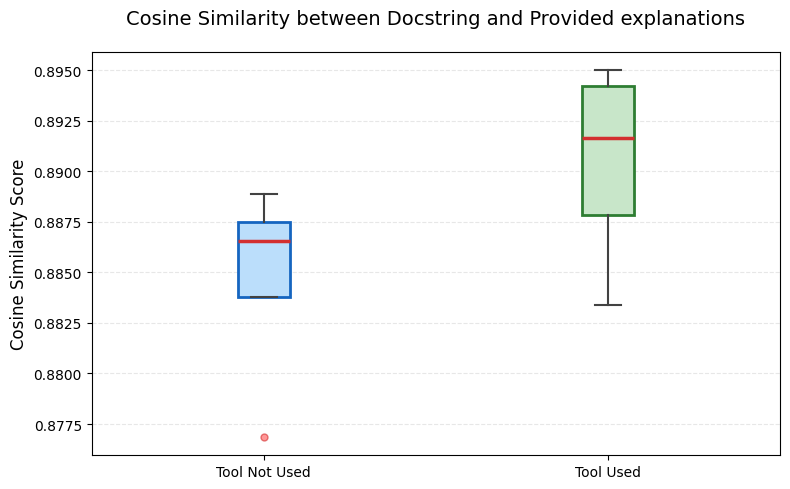

In [150]:
import matplotlib.pyplot as plt

scores_data = [np.array(tool_not_used_scores), np.array(tool_used_scores)]
labels = ["Tool Not Used", "Tool Used"]

plt.figure(figsize=(8, 5))
bp_scores = plt.boxplot(
    scores_data,
    labels=labels,
    patch_artist=True,
    medianprops=dict(color='#D32F2F', linewidth=2.5),
    whiskerprops=dict(color='#424242', linewidth=1.5),
    capprops=dict(color='#424242', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='#FF5252', markersize=5, linestyle='none', markeredgecolor='#D32F2F', alpha=0.6)
)

box_colors = ['#BBDEFB', '#C8E6C9']
edge_colors = ['#1565C0', '#2E7D32']

for patch, color, edge_color in zip(bp_scores['boxes'], box_colors, edge_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(edge_color)
    patch.set_linewidth(2)

plt.ylabel("Cosine Similarity Score", fontsize=12)
plt.title("Cosine Similarity between Docstring and Provided explanations", fontsize=14, pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()


plt.savefig("../figures/boxplot_cosine_similarity.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

In [145]:
np.array(tool_not_used_scores).mean(), np.array(tool_used_scores).mean()

(np.float32(0.8847115), np.float32(0.8904195))

In [153]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(
    tool_not_used_scores,
    tool_used_scores,
    equal_var=True
)

print("Statistic:", stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Possiamo rigettare l'ipotesi nulla: differenza significativa tra i gruppi.")
else:
    print("NON possiamo rigettare l'ipotesi nulla: differenza non significativa.")

Statistic: -1.5154303029167882
p-value: 0.18044387043936438
NON possiamo rigettare l'ipotesi nulla: differenza non significativa.
